In [ ]:
!rm -rf CovidDataset

In [ ]:
!unzip CovidDataset.zip

Archive:  CovidDataset.zip
   creating: CovidDataset/Train/
   creating: CovidDataset/Train/Covid/
  inflating: CovidDataset/Train/Covid/1052b0fe.jpg  
  inflating: CovidDataset/Train/Covid/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg  
  inflating: CovidDataset/Train/Covid/16654_1_1.png  
  inflating: CovidDataset/Train/Covid/16654_2_1.jpg  
  inflating: CovidDataset/Train/Covid/16654_4_1.jpg  
  inflating: CovidDataset/Train/Covid/16660_1_1.jpg  
  inflating: CovidDataset/Train/Covid/16660_2_1.jpg  
  inflating: CovidDataset/Train/Covid/16660_3_1.jpg  
  inflating: CovidDataset/Train/Covid/16660_4_1.jpg  
  inflating: CovidDataset/Train/Covid/16663_1_1.jpg  
  inflating: CovidDataset/Train/Covid/16664_1_1.jpg  
  inflating: CovidDataset/Train/Covid/16669_1_1.jpeg  
  inflating: CovidDataset/Train/Covid/16669_3_1.jpeg  
  inflating: CovidDataset/Train/Covid/16672_1_1.jpg  
  inflating: CovidDataset/Train/Covid/16708_1_1.jpg  
  inflating: CovidDataset/Train/Covid/16708_4_1.jpg  
  inflat

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


In [ ]:
# CNN Model with Keras

model = Sequential()
model.add((Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(250, 250, 3))))
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(3))

model.add(Conv2D(32, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(3))
model.add(Conv2D(32, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(2))

# Finally, we add a classification layer AND compile
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 32)      25632     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 38, 38, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)       

In [ ]:
train_data = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_data = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_data.flow_from_directory(
    'CovidDataset/Train',
    target_size = (250,250),
    batch_size = 32,
    class_mode = 'binary'
)

Found 304 images belonging to 2 classes.


In [ ]:
validation_generator = test_data.flow_from_directory(
    'CovidDataset/Val',
    target_size = (250,250),
    batch_size = 32,
    class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [ ]:
#COUNTING FILES IN TRAINING AND VALIDATION FOLDERS

import os
list1 = os.listdir('CovidDataset/Train/Covid') # DATASET TRAIN COVID FOLDER
number_files = len(list1)
print('CovidDataset/Train/Covid ', number_files)
print()
list2 = os.listdir('CovidDataset/Val/Covid') # DATASET VAL COVID FOLDER
number_files1 = len(list2)
print('CovidDataset/Val/Covid ', number_files1)
print()
list3 = os.listdir('CovidDataset/Train/Normal') # DATASET TRAIN COVID FOLDER
number_files2 = len(list3)
print('CovidDataset/Train/Normal ', number_files2)
print()
list4 = os.listdir('CovidDataset/Val/Normal') # DATASET VAL COVID FOLDER
number_files3 = len(list4)
print('CovidDataset/Val/Normal ', number_files3)

CovidDataset/Train/Covid  152

CovidDataset/Val/Covid  60

CovidDataset/Train/Normal  152

CovidDataset/Val/Normal  60


In [ ]:
#fitting the model
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 0.6967 - accuracy: 0.5000 - val_loss: 0.6733 - val_accuracy: 0.8438
Epoch 2/10
8/8 [==============================] - 8s 978ms/step - loss: 0.6889 - accuracy: 0.5208 - val_loss: 0.6751 - val_accuracy: 0.5893
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.6679 - accuracy: 0.6125 - val_loss: 0.5990 - val_accuracy: 0.6406
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.6259 - accuracy: 0.6758 - val_loss: 0.5931 - val_accuracy: 0.5714
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.5978 - accuracy: 0.6958 - val_loss: 0.4910 - val_accuracy: 0.8750
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 0.5134 - accuracy: 0.7656 - val_loss: 0.2813 - val_accuracy: 0.8929
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.3975 - accuracy: 0.8375 - val_loss: 0.3304 - val_accuracy: 0.8906
Epoch 8/10
8/8 [=====================

In [ ]:
#Class Activation Maps

In [ ]:
model.save("model_covid.h5")

In [ ]:
#prints [loss, accuracy]
model.evaluate_generator(train_generator)

[0.40529537200927734, 0.9046052694320679]

In [ ]:
#prints [loss, accuracy]
model.evaluate_generator(validation_generator)

[0.35413679480552673, 0.9166666865348816]

In [ ]:
model = load_model('model_covid.h5')

In [ ]:
y_actual = []
y_test = []

In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(250,250))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(250,250))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
#ADDING HEATMAP
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mx = confusion_matrix(y_actual, y_test)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


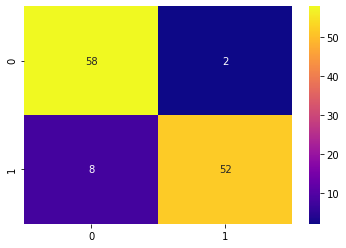

In [ ]:
sns.heatmap(conf_mx, cmap="plasma", annot=True)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


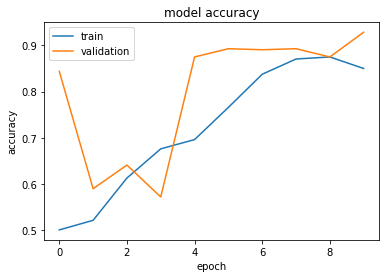

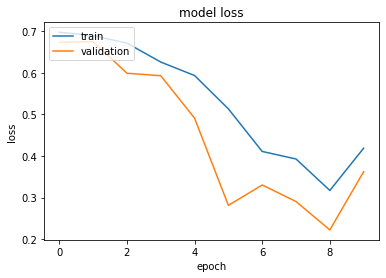

In [ ]:
#ADDING ACCURACY METRIC
#plotting accuracy and loss per epoch
print(hist.history.keys())
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#ADDING MSE METRIC
import tensorflow as tf
model = load_model('model_covid.h5')

#compiling
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
#fitting the model
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 10s 1s/step - loss: 0.1020 - mean_squared_error: 0.1156 - val_loss: 0.0672 - val_mean_squared_error: 0.0954
Epoch 2/10
8/8 [==============================] - 7s 873ms/step - loss: 0.0835 - mean_squared_error: 0.0911 - val_loss: 0.0479 - val_mean_squared_error: 0.0904
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.0744 - mean_squared_error: 0.0871 - val_loss: 0.0487 - val_mean_squared_error: 0.0847
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 0.0801 - mean_squared_error: 0.0858 - val_loss: 0.1108 - val_mean_squared_error: 0.0826
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.0755 - mean_squared_error: 0.0821 - val_loss: 0.0881 - val_mean_squared_error: 0.0810
Epoch 6/10
8/8 [==============================] - 8s 961ms/step - loss: 0.0822 - mean_squared_error: 0.0813 - val_loss: 0.0593 - val_mean_squared_error: 0.0813
Epoch 7/10
8/8 [==============================] - 9

In [ ]:
#prints out [loss, mse]
model.evaluate_generator(train_generator)

[0.07915621995925903, 0.07546262443065643]

In [ ]:
#prints out [loss, mse]
model.evaluate_generator(validation_generator)

[0.07944163680076599, 0.0750119537115097]

In [ ]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


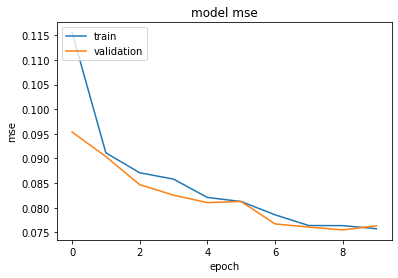

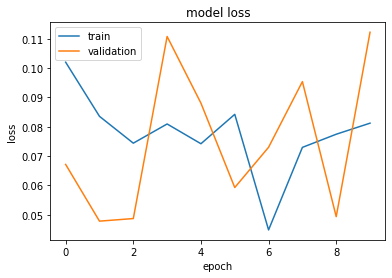

In [ ]:
#plotting mse and loss per epoch
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()